Your boss wants to know how electricity prices in NO2 and Germany have developed over the
sample period. Therefore, she has asked you to create a line plot that visualizes the hourly
electricity price in NO2 and Germany. The graph should:
- consist of two subplots:
o The first subplot shows the hourly electricity price in NO2 over time.
o The second subplot shows the hourly electricity price in Germany over time.
- add a vertical line to each subplot to indicate the official opening of Nordlink (December
9, 2020).
- be stored as a png file called “figure_task1.png”.

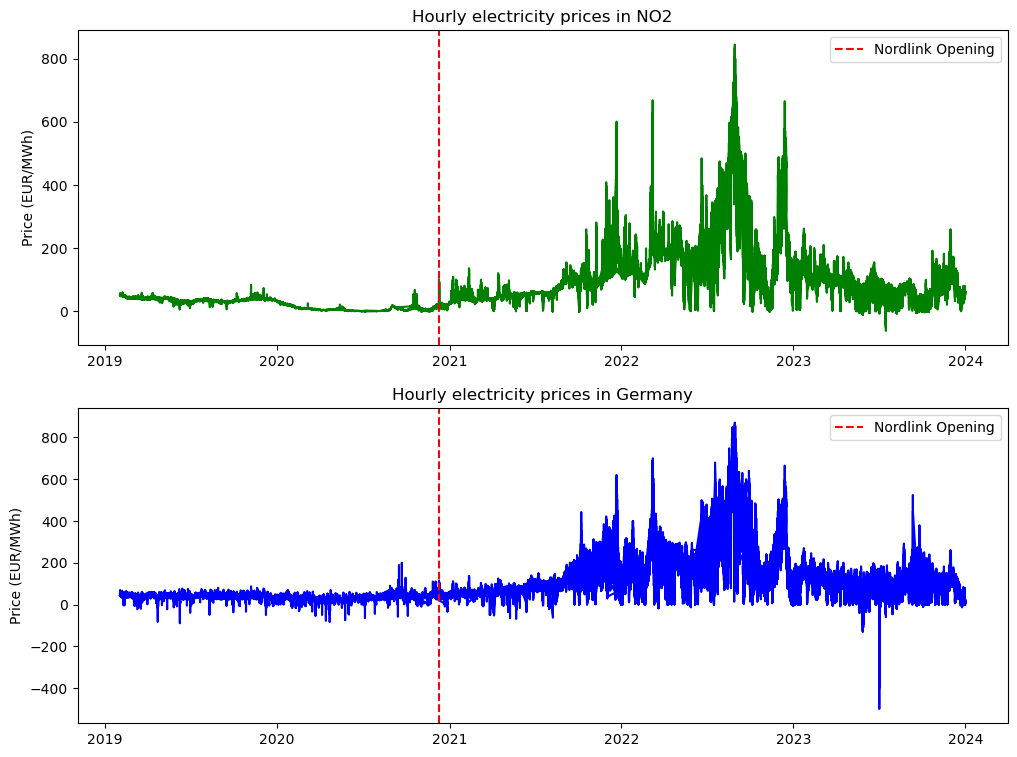

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

DATA_PATH = './data/DayAheadPrices_12.1.D'


pattern = glob.glob(f'{DATA_PATH}/*_DayAheadPrices_12.1.D.csv')
data = []

# Read each file and append to the data list
for file in pattern:
    df = pd.read_csv(file, sep='\t', parse_dates=['DateTime'])
    data.append(df)

# Concatenate all data into a single DataFrame
df = pd.concat(data, axis=0)

# 2. Filter for relevant data (NO2 and Germany with ResolutionCode PT60M)
df = df[(df['MapCode'].isin(['NO2', 'DE_LU'])) & (df['ResolutionCode'] == 'PT60M')]

# Separate data for NO2 and Germany
data_no2 = df[df['MapCode'] == "NO2"]
data_germany = df[df['MapCode'] == "DE_LU"]

# Making graph
fig, ax = plt.subplots(2,1, figsize = (12,9))

#Plotting NO2
ax[0].plot(data_no2['DateTime'], data_no2['Price'], color='green')
ax[0].axvline(pd.Timestamp('2020-12-09'), color='red', ls='--', label='Nordlink Opening')
ax[0].set_ylabel("Price (EUR/MWh)")
ax[0].set_title("Hourly electricity prices in NO2")
ax[0].legend()

# Plotting Germany
ax[1].plot(data_germany['DateTime'], data_germany['Price'], color='blue')
ax[1].axvline(pd.Timestamp('2020-12-09'), color='red', ls="--", label="Nordlink Opening")
ax[1].set_title('Hourly electricity prices in Germany')
ax[1].set_ylabel("Price (EUR/MWh)")
ax[1].legend()

# Saving the graph as figure_task1.png
plt.savefig("figure_task1.png")
plt.show()


CONCLUSION

From the graph, it is noticable that after opening of Nordlink both prices in NO2 and Germany started to increased. The highest peak was observed late September 2022 at the price above 800 euros. After that prices have decresed and in July 2023 the price had dropped so much that it was even minus (in Germany -500 euros), perhaps due to convergence of high renewable generation and low demand season as it is summer.On sunny and  windy days, renewable energy generation can increase sharply, sometimes producing more electricity than is needed, just from renewable sources alone.